In [1]:
library(GLMsData)
data(lungcap)

In [2]:
str(lungcap)

'data.frame':	654 obs. of  5 variables:
 $ Age   : int  3 4 4 4 4 4 4 5 5 5 ...
 $ FEV   : num  1.072 0.839 1.102 1.389 1.577 ...
 $ Ht    : num  46 48 48 48 49 49 50 46.5 49 49 ...
 $ Gender: Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
 $ Smoke : int  0 0 0 0 0 0 0 0 0 0 ...


In [3]:
lungcap$Gender = factor(lungcap$Gender)
lungcap$Smoke = factor(lungcap$Smoke)

In [4]:
lm.1 <- lm(log(FEV) ~ Age + Ht + Gender + Smoke, data=lungcap)

In [5]:
coef(summary(lm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.94399818,0.078638583,-24.720666,1.389306e-95
Age,0.02338721,0.003348451,6.984488,7.096410e-12
Ht,0.04279579,0.001678968,25.489334,7.664775e-100
GenderM,0.02931936,0.011718565,2.501958,1.259586e-02
Smoke1,-0.04606754,0.020910198,-2.203113,2.793739e-02


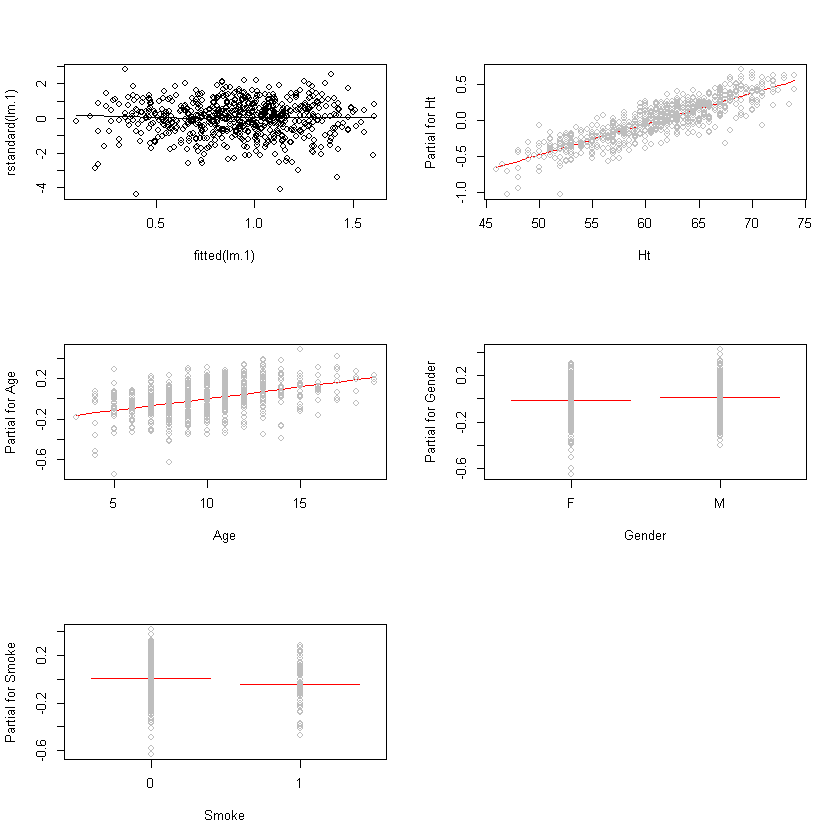

In [8]:
par( mfrow= c(3,2) )
scatter.smooth(rstandard(lm.1) ~ fitted(lm.1))
termplot(lm.1, partial.resid = TRUE, terms = "Ht")
termplot(lm.1, partial.resid = TRUE, terms = "Age")
termplot(lm.1, partial.resid = TRUE, terms = "Gender")
termplot(lm.1, partial.resid = TRUE, terms = "Smoke")

In [9]:
cd.1 <- cooks.distance(lm.1)

In [11]:
thres <- qf(0.5, 4, 649)

In [12]:
thres

[1] 0.8400512

In [17]:
a <- which(cd.1 < thres, arr.ind = TRUE)

In [19]:
extractAIC(lm.1,k=nobs(lm.1))

[1]   5.0000 743.4247

In [21]:
anova(lm.1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,43.2100549,43.21005487,2041.956379,1.330646e-202
Ht,1,15.3262790,15.32627897,724.266452,1.013797e-107
Gender,1,0.1533136,0.15331357,7.245064,7.292881e-03
Smoke,1,0.1027098,0.10270983,4.853708,2.793739e-02
Residuals,649,13.7335576,0.02116111,NA,NA


In [22]:
summary(lm.1)$sigma

[1] 0.1454686

In [23]:
lm.2 <- lm(log(FEV) ~ Age + log(Ht) + Gender + Smoke, data=lungcap)

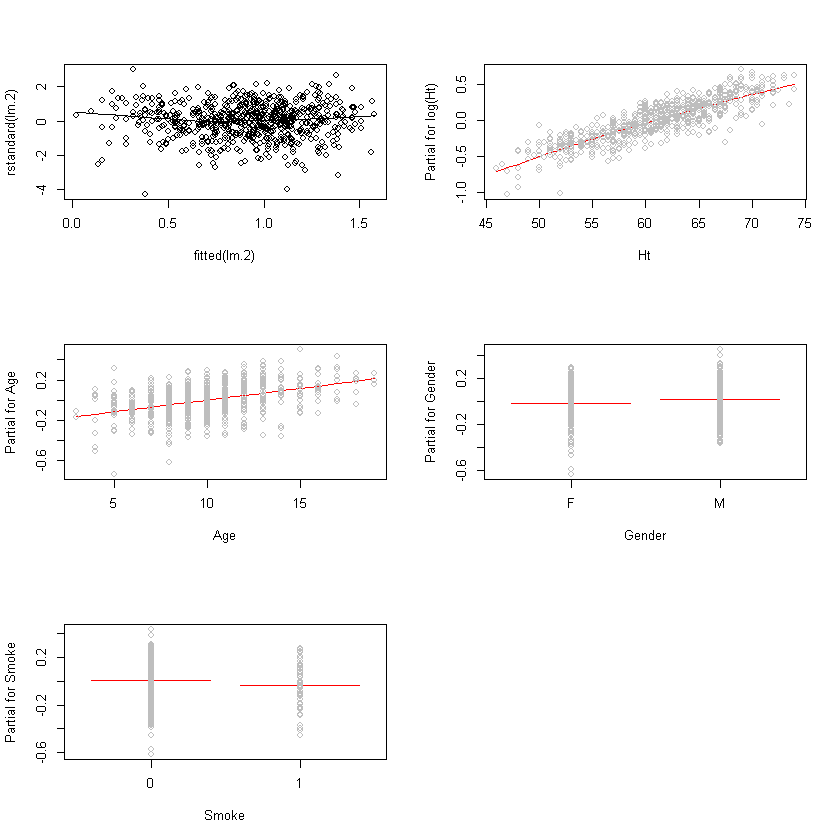

In [24]:
par( mfrow= c(3,2) )
scatter.smooth(rstandard(lm.2) ~ fitted(lm.2))
termplot(lm.2, partial.resid = TRUE, terms = "log(Ht)")
termplot(lm.2, partial.resid = TRUE, terms = "Age")
termplot(lm.2, partial.resid = TRUE, terms = "Gender")
termplot(lm.2, partial.resid = TRUE, terms = "Smoke")